**Exercise 3: crop human face out of picture and save to img file**

In [215]:
import cv2
import imutils
import matplotlib.pyplot as plt
%matplotlib inline

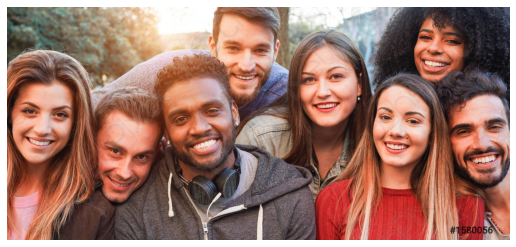

In [216]:
img = cv2.imread('group image.jpg')
plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.axis("off");
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.axis("off");

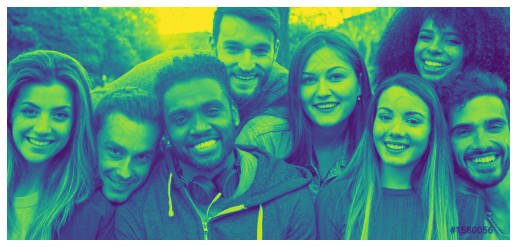

In [217]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(9,9))
plt.imshow(gray, ); plt.axis("off");

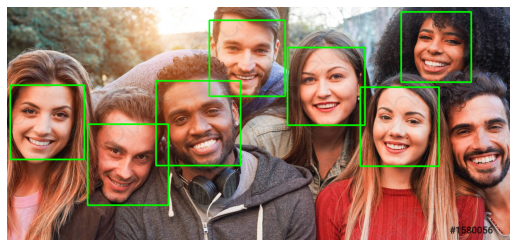

In [218]:
faces = face_cascade.detectMultiScale(gray, 1.04, 5, minSize = [200, 200])
sum = 0
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x + w, y + h), (0, 255, 0), 4)
#     qroi_color = img[y:y + h, x:x + w]
    sum +=1
plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off");

In [219]:
col_sum = round(sum/4)
col_sum

2

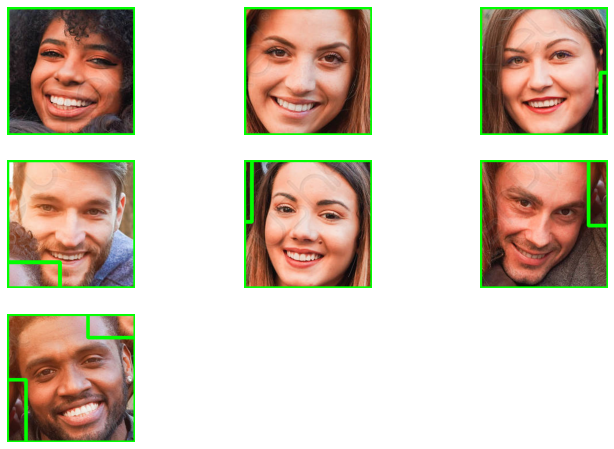

In [231]:
faces = face_cascade.detectMultiScale(gray, 1.04, 5, minSize = [200, 200])
c = 1
i = 0
fig = plt.figure(figsize=(12,8))
while i < len(faces): 
    (x,y,w,h) = faces[i]
    cv2.rectangle(img, (x,y), (x + w, y + h), (0, 255, 0), 6)
    crop = img[y:y+h,x:x+w]
    plt.subplot(3, 3, c)
    plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB));plt.axis("off");
    i += 1
    c += 1
    

In [ ]:
#For Video Camera
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
def save_face(frame, faces):
    i = 0 
    for (x,y,w,h) in faces:
        i += 1
        crop = frame[y:y + h, x:x+w]
        cv2.rectangle(img, (x,y),  (x + w, y + h), (255, 0, 0), 2)
        cv2.imwrite("file{}.png".format(i), crop)
    return

camera = cv2.VideoCapture(0)

while True:
    ret, img = camera.read()
    if net:
        #change to gray
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.2, 10, minSize = (100,100))
        
        for (x,y,w,h) in faces:
            cv2.rectangle(img, (x,y), (x + w, y + h), (255, 0, 0), 2)
            qroi_color = img[y:y + h, x:x + w]
        cv2.imshow( "picture", img)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
    elif key == ord('s'):
        save_face(img, faces)

camera.release()
cv2.destroyAllWindows()